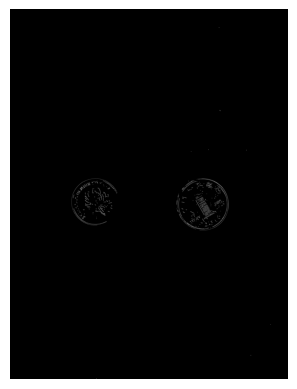

(<matplotlib.image.AxesImage at 0x7f4460787700>,
 (-0.5, 3071.5, 4095.5, -0.5),
 None)

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# img = cv2.imread("./img/coin.png", cv2.IMREAD_GRAYSCALE)
img = cv2.imread("./img/coin2.jpg", cv2.IMREAD_GRAYSCALE)

edges = cv2.Canny(img, 100, 200)

# plt.figure(figsize=(20, 16))
plt.imshow(edges, "gray"), plt.axis("off"), plt.show()

(4096, 3072)
[[[2134.5 2154.5  278. ]
  [ 940.5 2138.5  243. ]]]
(4096, 3072, 3)
[2134 2154  278]
[ 940 2138  243]


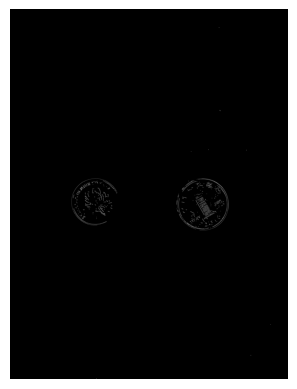

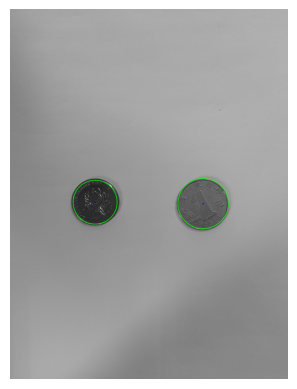

In [4]:
circles = cv2.HoughCircles(
    img,
    cv2.HOUGH_GRADIENT,
    dp=1,  # 图像分辨率和累加器分辨率比
    minDist=100,  # 被检测的圆心之间的最小距离
    param1=200,  # 传递给canny中的较高的阈值,低阈值是高阈值的一半
    param2=100,  # 检测阶段圆心的累加器阈值，越小，错误的圆越多
    minRadius=0,  # 最小圆半径
    maxRadius=0,  # 最大圆半径
)
print(img.shape)
print(circles)
circles = np.uint16(np.around(circles))
img_c = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
print(img_c.shape)
for i in circles[0, :]:
    print(i)
    # draw the outer circle
    cv2.circle(img_c, (i[0], i[1]), i[2], (0, 255, 0), 5)
    # draw the center of the circle
    cv2.circle(img_c, (i[0], i[1]), 2, (0, 0, 255), 10)

# plt.imshow(img, "gray"), plt.axis("off"), plt.show()
plt.imshow(edges, "gray"), plt.axis("off"), plt.show()
plt.imshow(img_c, "gray"), plt.axis("off"), plt.show()